# DOST AI Summer School 2017

## Copyright © 2017.  Rafael Cabredo and Maria Isabel Saludares

# Unsupervised learning 

Welcome to an overview of machine learning!

Remember the typical machine learning pipeline below?

<img src="images/MLPipeline.png">

Our task is to go through each step in the pipeline. 

# 1. Get your data

For this experiment, we will use a subset of the Breast Cancer Wisconsin dataset. This is found in the data folder: "data/breast-cancer-wisconsin.csv"

The original data set can be downloaded from: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29)

The data has 10 features and 699 instances.  Feature information can be seen below:
<pre>
 No  Feature                      Domain 
--------------------------------------------- 
  0  Sample Code number            id no  
  1  Clump Thickness               1 - 10   
  2  Uniformity of Cell Size       1 - 10
  3  Uniformity of Cell Shape      1 - 10
  4  Marginal Adhesion             1 - 10
  5  Single Epithelial Cell Size   1 - 10
  6  Bare Nuclei                   1 - 10
  7  Bland Chromatin               1 - 10
  8  Normal Nucleoli               1 - 10
  9  Mitoses                       1 - 10
 10  Class:                        (benign or malignant)
</pre>



In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

bcw_raw = pd.read_csv("data/breast-cancer-wisconsin.csv")
bcw_raw

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,Class
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign
5,1017122,8,10,10,8,7,10,9,7,1,malignant
6,1018099,1,1,1,1,2,10,3,1,1,benign
7,1018561,2,1,2,1,2,1,3,1,1,benign
8,1033078,2,1,1,1,2,1,1,1,5,benign
9,1033078,4,2,1,1,2,1,2,1,1,benign


After loading your data, it is a good practice to see what your data looks like.

Subtasks:  
1. Determine how many samples are benign or malignant
2. Visualize the different features


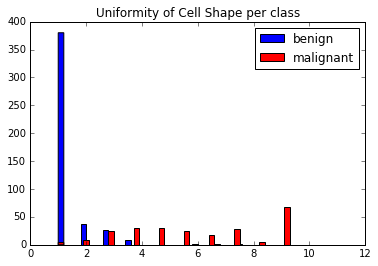

In [23]:
#subtask 1


#subtask 2
ax = plt.subplot(111)

#f2: Uniformity of Cell Shape
f2_benign = bcw_raw[bcw_raw.Class=="benign"]["f2"]
f2_malignant = bcw_raw[bcw_raw.Class=="malignant"]["f2"]

ax.hist(f2_benign, width=0.2,color='b', label="benign")
ax.hist(f2_malignant, width=0.2,color='r', label="malignant")

plt.title("Uniformity of Cell Shape per class")
plt.legend()
plt.show()


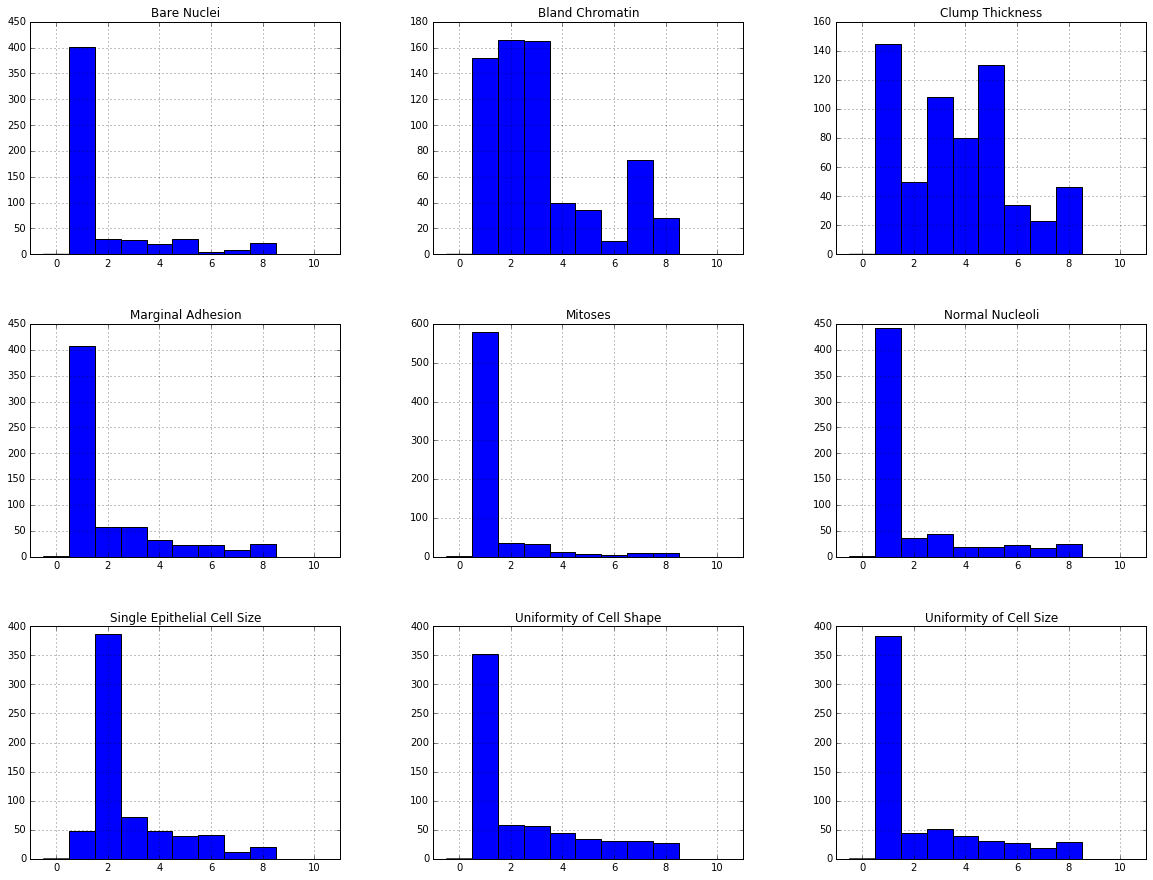

In [24]:
# Subtask 2 (another data visualization)

# Histogram of all the features
x = bcw_raw.drop(bcw_raw.columns[[0, 10]], axis=1)
x = np.array(x, dtype=int)
feature_names = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
                 "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei",
                 "Bland Chromatin", "Normal Nucleoli", "Mitoses"]
df = pd.DataFrame(x, range(x.shape[0]), columns = feature_names)

bins = range(11)
for array in df.hist(bins=np.arange(10)-0.5, figsize=(20,15)):
    for subplot in array:
        subplot.set_xlim((-1,11))

# 2. Train your model

## K-means Clustering

Clustering algorithms comes in two variants:
    1. a class: implements the <b>fit</b> method to learn the clusters on train data
    2. a function: returns the labels corresponding to the different clusters learned

K-means algorithm divides a set of N samples into K disjoint clusters.  The means are commonly claled the cluster "centroids"; note that they are not points from the dataset from rather the mean of the points belonging to that cluster.

The algorithm aims to choose centroids that minimize the <i>intertia<i/>, or within-cluster sum of square criterion.

Additional reference:  http://scikit-learn.org/stable/modules/clustering.html

In [25]:
from sklearn.cluster import KMeans
from sklearn import utils, metrics
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#Prepare the data for training. We remove the label/Class.
target = "Class"
X = bcw_raw.drop(bcw_raw.columns[[0, 10]], axis=1)
X = np.array(X,dtype=int) #change everything to an integer (just in case)
y = bcw_raw[target]
X,y = utils.shuffle(X, y)

# Let's make the y values numerical (0: benign, 1: malignant) so we can plot it easily
y = pd.Categorical(y).codes

# Choose a subset for training
#  split:  training (70%)   testing (30%)
X_train = X[:490]
y_train = y[:490]

X_test = X[491:]
y_test = y[491:]

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
kmeans.labels_

## This prints the location of the cluster centers in n dimension
##   n: number of features used
#kmeans.cluster_centers_  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

# 3. Test and validate your model

For evaluating our model, we want to use:
1. Accuracy
2. Precision
3. Recall
4. f1-score

These can be obtained using the <b>metrics.classication_report</b> function.


In [26]:

print(metrics.classification_report(y_train, kmeans.labels_))


             precision    recall  f1-score   support

          0       0.66      0.96      0.79       328
          1       0.08      0.01      0.01       162

avg / total       0.47      0.65      0.53       490



In [27]:
y_test_pred = kmeans.predict(X_test)
y_test_pred
#print(metrics.classification_report(y_test, y_test_pred))

/Users/UCL/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)


Note how different the performance is compared to the results in supervised learning. Compare and discuss the different in their peformance.

Changes can be made on the pecific features used for the clustering.  By setting a <b>different set of features</b>, you can check how dropping some of the features may change the performance of the clustering.


In [28]:

# Select only some of the features for the clustering
# For example use only features 2, 3, 4

feat_for_clus_names = [ "Uniformity of Cell Size",
                        "Uniformity of Cell Shape",
                        "Bland Chromatin"]
feat_for_clus = [2,3,7]
X_train_3 = X_train[:, feat_for_clus]
X_train_3


array([[1, 1, 2],
       [1, 1, 3],
       [1, 1, 1],
       ..., 
       [2, 2, 3],
       [3, 1, 1],
       [1, 1, 1]])

### Visualization
Visualize the selected features in 3D space (since we selected only 3 features).

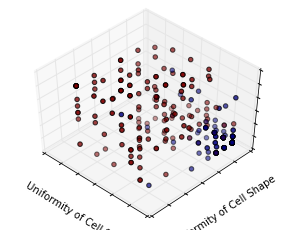

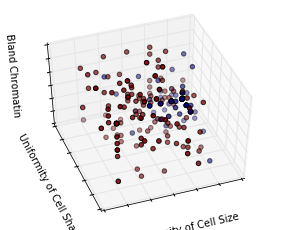

In [29]:
X_train_3 = X_train[:, feat_for_clus]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_train_3[:, 0], X_train_3[:, 1], X_train_3[:, 2], c=y_train.astype(np.float))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel(feat_for_clus_names[0])
ax.set_ylabel(feat_for_clus_names[1])
ax.set_zlabel(feat_for_clus_names[2])

fig = plt.figure(2, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=70)
ax.scatter(X_train_3[:, 0], X_train_3[:, 1], X_train_3[:, 2], c=y_train.astype(np.float))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel(feat_for_clus_names[0])
ax.set_ylabel(feat_for_clus_names[1])
ax.set_zlabel(feat_for_clus_names[2])

In [30]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_3)
print(metrics.classification_report(y_train, kmeans.labels_))

             precision    recall  f1-score   support

          0       0.06      0.02      0.03       328
          1       0.11      0.23      0.15       162

avg / total       0.08      0.09      0.07       490



# Activity

1. Select 2 different sets of features. Use two (2) features for Set 1 and five (5) features for Set 2.  Visualize the features for Set 1
2. Evaluate their performances using the labels
3. Compare their results with the previous results

## Feature Set 1

### Identify features (and visualization)

In [31]:
## Insert code

### Performance Evaluation

In [32]:
## Insert code

## Feature Set 2

### Identify features

In [33]:
## Insert code


### Performance Evaluation

In [34]:
## Insert code

## Discussion

### Comparison of results